## Quiz #0502

### "Human Activity Recognition" 

#### Answer the following questions by providing Python code:
#### Objectives:
- Carry out the EDA.
- Carry out the data pre-processing.
- Optimize and test a predictive model of your choice.

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
import sklearn
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).

In [229]:
# Go to the directory where the data file is located. 
# os.chdir(r'~~')                # Please, replace the path with your own. 

In [230]:
df = pd.read_csv('data_human activity recognition.csv', header='infer')

In [231]:
df.shape

(19622, 160)

In [232]:
df.columns

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=160)

1). Carry out the EDA. Check for the missing values. HINT: The response variable is 'classe'.

In [233]:
       # <Your code goes in here>
df.isnull().values.any()


True

In [234]:
(df.user_name.isnull().sum())
df.user_name.value_counts().sum()

19622

2). Get rid of the columns that have more than 97% missing values.

In [235]:
# <Your code goes in here>
for column in list(df.columns)[:-1] :
       if (df[column].isnull().sum() / df.user_name.value_counts().sum() > 0.97) :
              df.drop(column,axis=1,inplace=True)

df.shape

(19622, 60)

In [236]:
df.isnull().values.any()

False

3). Get rid of the unnecessary columns. HINT: Those columns with "time" in the name and those that are obviously unnecessary.

In [237]:
for column in list(df.columns)[:-1] :
       if 'time' in str(column) :
              df.drop(column,axis=1,inplace=True)

In [238]:
for column in list(df.columns)[2:-1] :
       if not (('belt' in str(column)) or ('forearm'  in str(column))) :
              df.drop(column,axis=1,inplace=True)


df.drop('Unnamed: 0',axis=1 , inplace=True)

In [239]:
df.classe.value_counts()

A    5580
B    3797
E    3607
C    3422
D    3216
Name: classe, dtype: int64

In [240]:
df.columns

Index(['user_name', 'roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'magnet_forearm_z', 'classe'],
      dtype='object')

### since we're trying to classify the current activity of persons (walking, standing ..etc) the info about the forearm / belt are important 

<AxesSubplot:xlabel='accel_belt_x', ylabel='total_accel_forearm'>

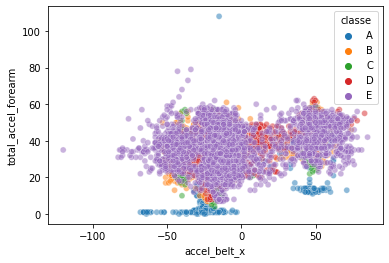

In [269]:
sns.scatterplot('accel_belt_x', 'total_accel_forearm',hue = 'classe' , data=df,alpha=0.5)

<AxesSubplot:>

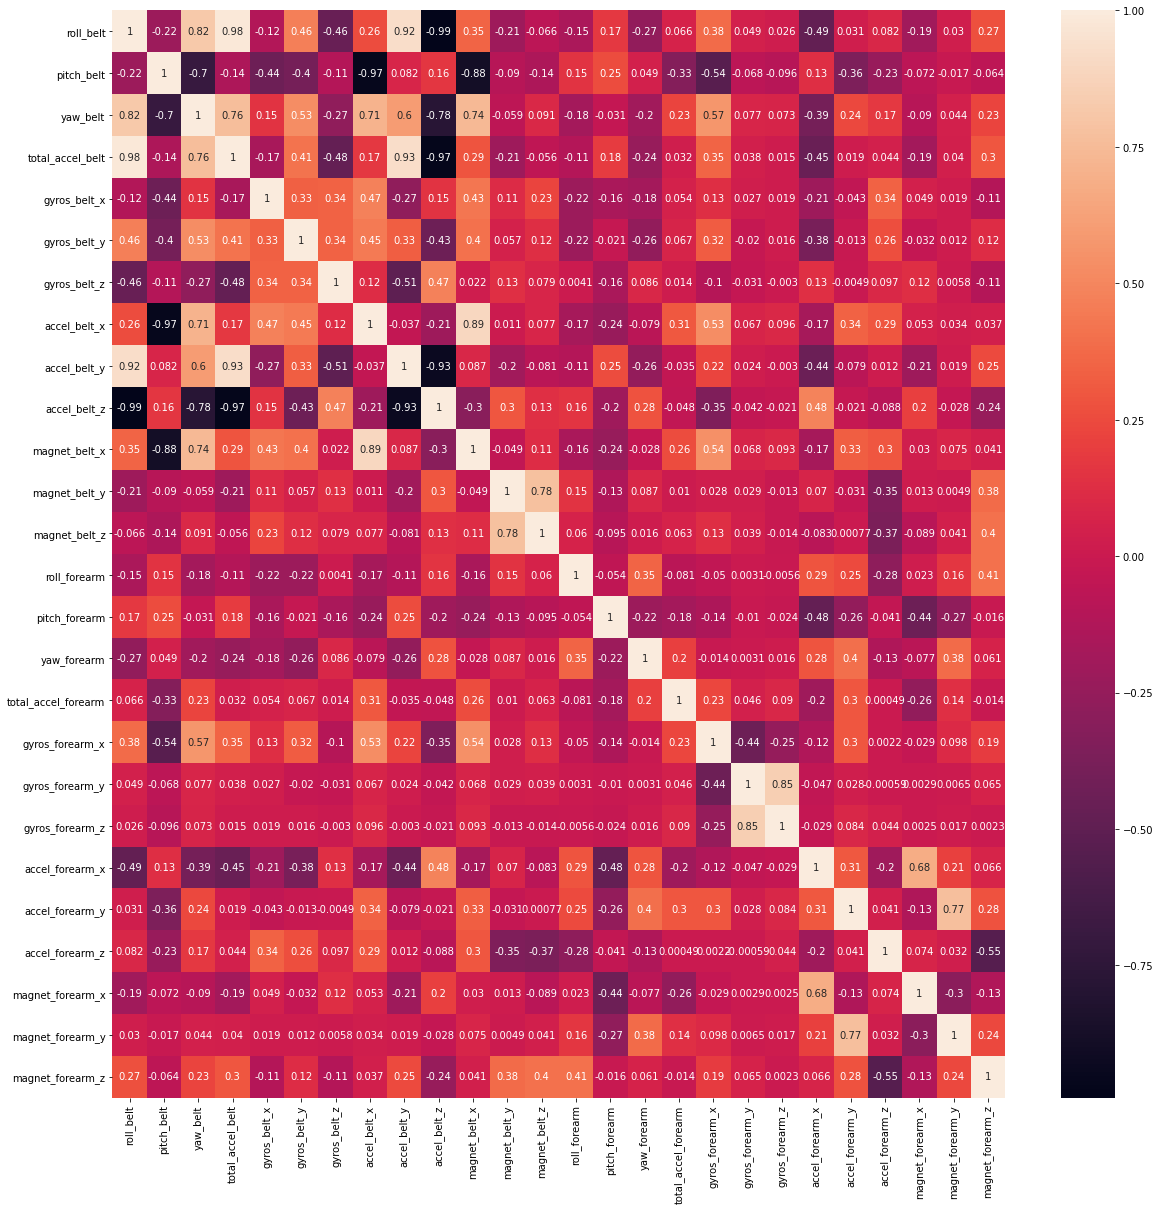

In [242]:
plt.subplots(figsize =(20,20))
sns.heatmap(df.corr() , annot=True)

4). Label encode the responde variable. HINT: use preprocessing.LabelEncoder(). 

In [243]:
       # <Your code goes in here>
labelEncoder = preprocessing.LabelEncoder()
df['classe_n'] = labelEncoder.fit_transform(df['classe'])
df

user_name  roll_belt  pitch_belt  yaw_belt  total_accel_belt  \
0      carlitos       1.41        8.07     -94.4                 3   
1      carlitos       1.41        8.07     -94.4                 3   
2      carlitos       1.42        8.07     -94.4                 3   
3      carlitos       1.48        8.05     -94.4                 3   
4      carlitos       1.48        8.07     -94.4                 3   
...         ...        ...         ...       ...               ...   
19617    adelmo     147.00      -34.80     129.0                21   
19618    adelmo     145.00      -35.30     130.0                19   
19619    adelmo     145.00      -35.50     130.0                19   
19620    adelmo     143.00      -35.90     131.0                18   
19621    adelmo     143.00      -36.00     132.0                18   

       gyros_belt_x  gyros_belt_y  gyros_belt_z  accel_belt_x  accel_belt_y  \
0              0.00          0.00         -0.02           -21             4   
1              0.02          0.00         -0.02           -22             4   
2              0.00          0.00         -0.02           -20             5   
3              0.02          0.00         -0.03           -22             3   
4              0.02          0.02         -0.02           -21             2   
...             ...           ...           ...           ...           ...   
19617          0.37         -0.02         -0.67            50            26   
19618          0.39         -0.02         -0.67            47            15   
19619          0.37          0.00         -0.64            47            13   
19620          0.37         -0.02         -0.59            46            18   
19621          0.35         -0.02         -0.57            42            25   

       ...  gyros_forearm_y  gyros_forearm_z  accel_forearm_x  \
0      ...             0.00            -0.02              192   
1      ...             0.00            -0.02              192   
2      ...            -0.02             0.00              196   
3      ...            -0.02             0.00              189   
4      ...             0.00            -0.02              189   
...    ...              ...              ...              ...   
19617  ...            -1.75            -0.25             -271   
19618  ...            -1.36             0.00             -271   
19619  ...            -1.20             0.05             -263   
19620  ...            -0.90             0.05             -270   
19621  ...            -0.64             0.08             -278   

       accel_forearm_y  accel_forearm_z  magnet_forearm_x  magnet_forearm_y  \
0                  203             -215               -17             654.0   
1                  203             -216               -18             661.0   
2                  204             -213               -18             658.0   
3                  206             -214               -16             658.0   
4                  206             -214               -17             655.0   
...                ...              ...               ...               ...   
19617              -68              -37              -205            -587.0   
19618              -91              -43              -151            -635.0   
19619              -99              -45              -116            -654.0   
19620             -141              -51               -68            -678.0   
19621             -159              -52               -60            -686.0   

       magnet_forearm_z  classe  classe_n  
0                 476.0       A         0  
1                 473.0       A         0  
2                 469.0       A         0  
3                 469.0       A         0  
4                 473.0       A         0  
...                 ...     ...       ...  
19617               6.0       E         4  
19618             -36.0       E         4  
19619             -70.0       E         4  
19620             -98.0       E         4  
19

In [244]:
df.groupby(['user_name','classe']).mean()

roll_belt  pitch_belt    yaw_belt  total_accel_belt  \
user_name classe                                                         
adelmo    A       123.641202  -42.711073  169.455794         17.503863   
          B       125.411082  -44.020232  148.431701         17.863402   
          C       126.313333  -41.628667  163.092000         17.752000   
          D       124.454369  -42.439417  165.972816         17.566990   
          E       144.465015  -35.160641  130.855685         20.326531   
carlitos  A         1.294496    7.458381  -93.693765          3.125899   
          B         1.319043    6.274928  -92.548116          3.008696   
          C         1.315335    6.356024  -92.729412          2.929006   
          D         1.311214    7.121420  -93.544650          3.004115   
          E         0.588752    5.482233  -92.479146          2.857143   
charles   A       116.091212   21.268521   -5.969911         17.744160   
          B       116.055034   16.862685   -5.372738         17.442953   
          C       119.517625   14.069759    1.477217         17.910946   
          D       118.669782   16.216511   -0.448707         17.890966   
          E       140.727145    8.519733   49.094121         21.018284   
eurico    A         1.338208    4.255607  -87.920347          2.906358   
          B         1.230372    2.893834  -88.647128          2.548986   
          C         1.219243    2.396299  -88.247444          2.478528   
          D        -4.285223   -0.714502  -83.702405          4.852234   
          E        -0.036089    7.675720  -87.612177          3.494465   
jeremy    A         0.675616    4.888692  -88.147069          4.581138   
          B         0.705256    4.321779  -87.902249          4.249489   
          C         0.720322    4.687577  -87.865031          4.616564   
          D         0.767969    4.497395  -87.765134          4.396552   
          E         0.791495    1.228132  -85.196797          4.040925   
pedro     A       124.581250   26.512813   -1.960828         19.885938   
          B       122.100990   26.471485   -4.603663         19.352475   
          C       122.094188   25.437876   -4.430762         19.312625   
          D       121.287846   25.371429   -5.645928         19.191898   
          E       136.327968   23.515091   15.017163         21.975855   

                  gyros_belt_x  gyros_belt_y  gyros_belt_z  accel_belt_x  \
user_name classe                                                           
adelmo    A           0.107914      0.111691     -0.170464     47.822318   
          B           0.116701      0.111302     -0.166946     49.978093   
          C           0.110053      0.111787     -0.169027     47.964000   
          D           0.119437      0.111398     -0.164039     48.163107   
          E           0.133324      0.107274     -0.174227     51.536443   
carlitos  A           0.016175      0.001739     -0.020635    -19.490408   
          B           0.014594      0.003058     -0.020058    -16.555072   
          C           0.017890      0.001704     -0.019878    -16.906694   
          D           0.016173      0.002099     -0.022881    -18.366255   
          E           0.014319      0.003054     -0.023317    -13.221675   
charles   A           0.100489      0.117208     -0.171057    -25.074527   
          B           0.109114      0.115087     -0.168765    -21.006711   
          C           0.111985      0.114323     -0.165955    -18.419295   
          D           0.108442      0.113972     -0.171667    -21.091900   
          E           0.122686      0.107173     -0.156554    -17.483826   
eurico    A           0.009445      0.004416     -0.017988     -9.363006   
          B           0.016689      0.002922     -0.021233     -6.755068   
          C           0.013926      0.003906     -0.022065     -5.672802   
          D           0.018282     -0.003179     -0.036306     -6.343643   
          E           0.096494     -0.005332     -0.02

5). Carry out min-max scaling of the exploratory variables. HINT: use preprocessing.MinMaxScaler().

In [245]:
       # <Your code goes in here>
df_ = df.drop(['user_name' , 'classe','classe_n'] ,axis=1,inplace=False)
scaler = preprocessing.MinMaxScaler()
scaler.fit(df_)
df_s = scaler.transform(df_)


6). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s)
- Calculate the accuracy.
- Aim for upper 90% accuracy.

In [248]:
X = df_s
y = df['classe_n']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=1234)

## using knn

In [257]:
k0 = 0
acc0 = 0
for k in range(2,60):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    acc = sklearn.metrics.accuracy_score(y_pred , Y_test)
    if acc > acc0 : 
        acc0 = acc
        k0 = k
print('k = ' ,k0,' best Accuracy : {}'.format(np.round(acc0,3)))


k =  3  best Accuracy : 0.936


## using Decision Tree


In [249]:
model = DecisionTreeClassifier( )
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

acc = sklearn.metrics.accuracy_score(y_pred , Y_test)
print('Accuracy : {}'.format(np.round(acc,3)))

Accuracy : 0.925


In [250]:
import graphviz 

dot_data = tree.export_graphviz(model, out_file=None, 
            filled=True, rounded=True,  
            special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.view()

'Source.gv.pdf'